### 4_Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "plt.x". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

For each chart, make sure to use a copy of the data frame.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df = df.set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [17]:
# Clean data
df = df[(df["value"] > df["value"].quantile(.025)) & (df["value"] < df["value"].quantile(.975))]
df.index = pd.to_datetime(df.index)
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


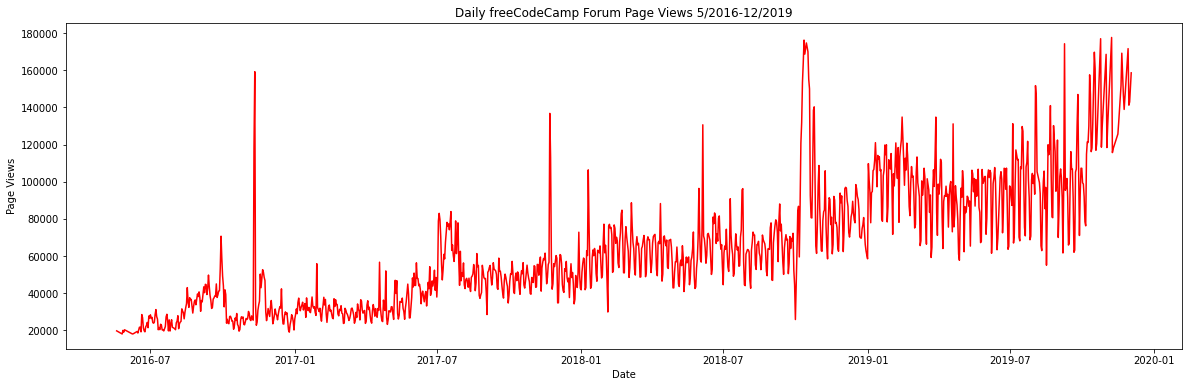

In [19]:
# Draw line plot
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# https://stackoverflow.com/questions/43538396/python-how-can-i-change-the-x-axis-interval-to-show-12-months-using-matplotlib
# gca - get current axis, gcf - figure
fig = plt.figure(figsize=(20,6))
plt.plot(df.index,df["value"],color="r")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", color = "black")
plt.xlabel("Date",color = "black")
plt.ylabel("Page Views",color = "black")
plt.show()


In [ ]:
# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

In [ ]:
# Copy and modify data for monthly bar plot
df_bar = None

# Draw bar plot





# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

In [ ]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)





# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')